<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_3_Deep_learning_Q2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2**

#####Implement the LeNet Convolutional Neural Network using Keras. It is a seven-layer network with three convolutional layers, two max-pooling layers and 2 dense layers. The structure is shown below:
#####Layer 1: convolution layer with 6 convolution kernels of 5x5 with stride 1
#####Layer 2: max-pooling layer with 2x2 kernels with stride 2
#####Layer 3: convolution layer with 16 convolution kernels of 5x5 with stride 1
#####Layer 4: max-pooling layer with 2x2 kernels with stride 2
#####Layer 5: convolution layer with 120 convolution kernels of 5x5
#####Layer 6: dense layer with 84 neurons
#####Layer 7: output layer
#####Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25 epochs. You can use the built-in functions to load the data. Each image is 32x32x3 matrix and you will have 60,000 images for training and 10,000 for test. There are 10 classes in the dataset each representing an object in the image.
#####Perform the following analysis and answer each question briefly (3-5 sentences). Use plots and figures as necessary.

1.   What is the effect of learning rate on the training process? Which performed best?
1.   What is the effect of batch size on the training process? Which performed best?
2.   Try different hyperparameters to obtain the best accuracy on the test set. What is your 
best performance and what were the hyperparameters?
2.   Implement an equivalent feed forward network for the same task with each hidden layer 
containing the same number of neurons as the number of filters in each convolution layer. Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25 epochs. Compare its performance with your LeNet implementation based on the following questions:

>> a. What is its performance? <br>
>> b. How many parameters are there in this network compared to the LeNet implementation? Are they worth it?







**Solution 2**

**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt                           
import tensorflow as tf

from tabulate import tabulate
import random                        
from datetime import datetime

**Loading Data**

In [ ]:
# CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train=x_train.reshape(50000,32,32,3)
x_test=x_test.reshape(10000,32,32,3)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Normalize the train and test data for better output
x_train /=255
x_test /=255

170498071/170498071 [==============================] - 3s 0us/step


**Data Type**

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


**Plotting**

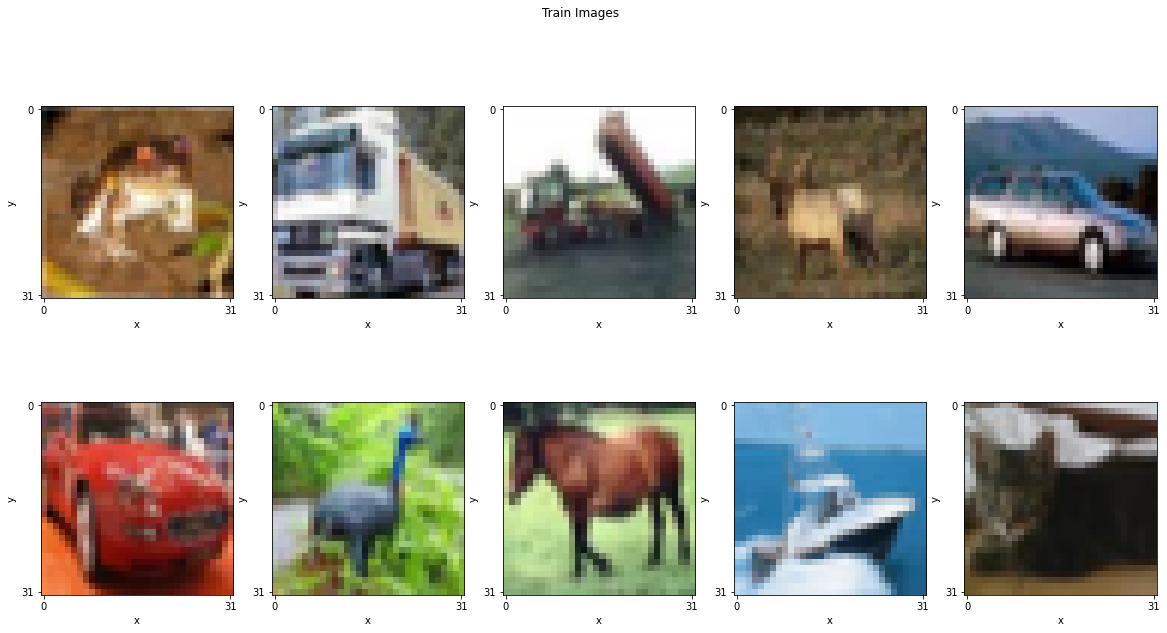

In [ ]:
fig, ax = plt.subplots(2,5,figsize = (20, 10))
fig.suptitle('Train Images')
ax = ax.flatten()
for i in range(10):
    img_idx = np.argwhere(y_train == i)[0]
    ax[i].set(xlabel='x', ylabel='y')
    plt.setp(ax, xticks=[0, 31], yticks=[0, 31])
    plottable_image = np.reshape(x_train[i,:,:,:], (32, 32,3))
    ax[i].imshow(plottable_image, cmap='gray')

**Implement the LeNet Convolutional Neural Network with seven layer using Keras**

In [ ]:
model = tf.keras.models.Sequential()
# Layer 1: convolution layer with 6 convolution kernels of 5x5 with stride 1
model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
# Layer 2: max-pooling layer with 2x2 kernels with stride 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Layer 3: convolution layer with 16 convolution kernels of 5x5 with stride 1
model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
# Layer 4: max-pooling layer with 2x2 kernels with stride 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Layer 5: convolution layer with 120 convolution kernels of 5x5
model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))

model.add(tf.keras.layers.Flatten())
# Layer 6: dense layer with 84 neurons
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Activation('relu'))
# There are 10 classes in the dataset each representing an object in the image so I put 10 neurons in the output layer.
model.add(tf.keras.layers.Dense(10))
# softmax activation function
model.add(tf.keras.layers.Activation('softmax'))
# Adam optimizer with learning rate 0.001
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
# building the model
model.build(input_shape=(128,32,32,3))

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (128, 32, 32, 6)          456       
                                                                 
 max_pooling2d (MaxPooling2D  (128, 16, 16, 6)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (128, 16, 16, 16)         2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (128, 8, 8, 16)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (128, 8, 8, 120)          48120     
                                                                 
 flatten (Flatten)           (128, 7680)               0

In [ ]:
# CIFAR-10 dataset for batch size 128 and 25 epochs
model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
391/391 [==============================] - 91s 230ms/step - loss: 1.6006 - accuracy: 0.4235
Epoch 2/25
391/391 [==============================] - 89s 226ms/step - loss: 1.2521 - accuracy: 0.5566
Epoch 3/25
391/391 [==============================] - 87s 224ms/step - loss: 1.0926 - accuracy: 0.6165
Epoch 4/25
391/391 [==============================] - 95s 242ms/step - loss: 0.9810 - accuracy: 0.6575
Epoch 5/25
391/391 [==============================] - 87s 224ms/step - loss: 0.8883 - accuracy: 0.6913
Epoch 6/25
391/391 [==============================] - 88s 224ms/step - loss: 0.8025 - accuracy: 0.7207
Epoch 7/25
391/391 [==============================] - 89s 229ms/step - loss: 0.7229 - accuracy: 0.7503
Epoch 8/25
391/391 [==============================] - 103s 264ms/step - loss: 0.6527 - accuracy: 0.7744
Epoch 9/25
391/391 [==============================] - 96s 245ms/step - loss: 0.5894 - accuracy: 0.7955
Epoch 10/25
391/391 [==============================] - 88s 226ms/step - 

**Train and Test Loss and Accuracy**

In [ ]:
score = model.evaluate(x_train, y_train)
print('Train Loss:', score[0])
print('Train Accuracy:', score[1])

1563/1563 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9634
Train Loss: 0.10827234387397766
Train Accuracy: 0.9634400010108948


In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.5371 - accuracy: 0.6452
Test Loss: 2.5370664596557617
Test Accuracy: 0.6452000141143799


**2.1 Effect of learning rate on the training process**

To examine the effect of learning rate on the training process, we took different learning rate as $0.0001, 0.001, 0.005, 0.01, 0.05, 0.1$.


In [ ]:
learningRate=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
acc=np.zeros(6)
for i in range(len(learningRate)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[i]) # different batch size = 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    model.build(input_shape=(128,32,32,3))
    accuracy= model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=0)
    acc[i]=accuracy.history['accuracy'][24]
    score = model.evaluate(x_train, y_train)
    print('Train Loss:', score[0])
    print('Train Accuracy:', score[1])
    score = model.evaluate(x_test, y_test)
    print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9195 - accuracy: 0.6826
Train Loss: 0.9194771647453308
Train Accuracy: 0.6826199889183044
313/313 [==============================] - 1s 3ms/step - loss: 1.0437 - accuracy: 0.6396
Test Loss: 1.043695092201233
Test Accuracy: 0.6395999789237976
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9821
Train Loss: 0.05495435371994972
Train Accuracy: 0.9821400046348572
313/313 [==============================] - 1s 3ms/step - loss: 2.2366 - accuracy: 0.6742
Test Loss: 2.2366042137145996
Test Accuracy: 0.6741999983787537
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8588 - accuracy: 0.6931
Train Loss: 0.8588175177574158
Train Accuracy: 0.6930599808692932
313/313 [==============================] - 1s 3ms/step - loss: 1.4813 - accuracy: 0.5409
Test Loss: 1.4812897443771362
Test Accuracy: 0.5408999919891357
1563/1563 [==============================] - 5s 3ms/step - loss: 2.303

[0.67295998 0.96635997 0.67553997 0.10074    0.10064    0.09918   ]


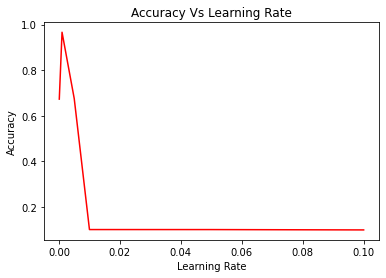

In [ ]:
print(acc)
plt.plot(np.array(learningRate).reshape(6,1), np.array(acc).reshape(6,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.title('Accuracy Vs Learning Rate')
plt.show()

**Which one performed best for different learning rates**

In [ ]:
# Assign Data
mydata = [[0.0001, 0.67295998, 0.9194771647453308, 0.6826199889183044, 1.043695092201233, 0.6395999789237976],
          [0.001, 0.96635997, 0.05495435371994972, 0.9821400046348572, 2.2366042137145996, 0.6741999983787537],
          [0.005, 0.67553997, 0.8588175177574158, 0.6930599808692932, 1.4812897443771362, 0.5408999919891357],
          [0.01, 0.10074, 2.3031210899353027, 0.10000000149011612, 2.303119659423828, 0.10000000149011612],
          [0.05, 0.10064, 2.306447744369507, 0.10000000149011612, 2.3064465522766113, 0.10000000149011612],
          [0.1, 0.09918, 2.3094489574432373, 0.10000000149011612, 2.3094494342803955, 0.10000000149011612]]
head = ["Learning Rate", "Accuarcy", "Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------+------------+--------------+------------------+-------------+-----------------+
|  Learning Rate  |  Accuarcy  |  Train Loss  |  Train Accuracy  |  Test Loss  |  Test Accuracy  |
+=================+============+==============+==================+=============+=================+
|     0.0001      |  0.67296   |   0.919477   |     0.68262      |   1.0437    |     0.6396      |
+-----------------+------------+--------------+------------------+-------------+-----------------+
|      0.001      |  0.96636   |  0.0549544   |     0.98214      |   2.2366    |     0.6742      |
+-----------------+------------+--------------+------------------+-------------+-----------------+
|      0.005      |  0.67554   |   0.858818   |     0.69306      |   1.48129   |     0.5409      |
+-----------------+------------+--------------+------------------+-------------+-----------------+
|      0.01       |  0.10074   |   2.30312    |       0.1        |   2.30312   |       0.1       |
+---------

#####Based on the above results, we can say that the smaller learning rate generates better accuracy results. For my case, learning rate = 0.001 gives lowest training loss and highest accuarcy (all case). But learning rate 0.0001 accuracy is lower than learning rate 0.001. This may cause due to random initialization which leads to different local minima or overfitting.

**2.2 Effect of batch size on the training process**

To examine the effect of batch size on the training process, we took different batch size as $64, 128, 256, 512, 1024$.

In [ ]:
batch=[64, 128, 256, 512, 1024]
acc=np.zeros(5)
for i in range(len(batch)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    model.build(input_shape=(128,32,32,3))
    accuracy= model.fit(x_train, y_train, batch_size=batch[i], epochs=25, verbose=0) # different batch size = 64, 128, 256, 512, 1024
    acc[i]=accuracy.history['accuracy'][24]
    score = model.evaluate(x_train, y_train)
    print('Train Loss:', score[0])
    print('Train Accuracy:', score[1])
    score = model.evaluate(x_test, y_test)
    print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])

1563/1563 [==============================] - 5s 3ms/step - loss: 0.0545 - accuracy: 0.9817
Train Loss: 0.05453953146934509
Train Accuracy: 0.981719970703125
313/313 [==============================] - 1s 3ms/step - loss: 2.6560 - accuracy: 0.6501
Test Loss: 2.655984878540039
Test Accuracy: 0.6500999927520752
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0832 - accuracy: 0.9721
Train Loss: 0.08315552771091461
Train Accuracy: 0.972100019454956
313/313 [==============================] - 1s 4ms/step - loss: 2.5797 - accuracy: 0.6467
Test Loss: 2.579679012298584
Test Accuracy: 0.6467000246047974
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1617 - accuracy: 0.9479
Train Loss: 0.16174347698688507
Train Accuracy: 0.947920024394989
313/313 [==============================] - 1s 3ms/step - loss: 1.4171 - accuracy: 0.6765
Test Loss: 1.4171066284179688
Test Accuracy: 0.6765000224113464
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3419 

[0.96957999 0.97593999 0.93769997 0.86684    0.73096001]


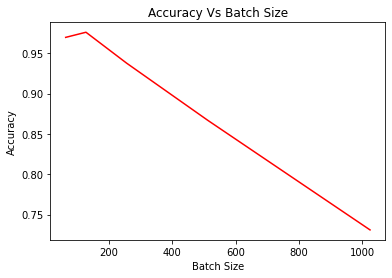

In [ ]:
print(acc)
plt.plot(np.array(batch).reshape(5,1), np.array(acc).reshape(5,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs Batch Size')
plt.show()

**Which one performed best for different batch sizes**

In [ ]:
# Assign Data
mydata = [[64, 0.96957999, 0.05453953146934509, 0.981719970703125, 2.655984878540039, 0.6500999927520752],
          [128, 0.97593999, 0.08315552771091461, 0.972100019454956, 2.579679012298584, 0.6467000246047974],
          [256, 0.93769997, 0.16174347698688507, 0.947920024394989, 1.4171066284179688, 0.6765000224113464],
          [512, 0.86684, 0.34186235070228577, 0.8863400220870972, 1.0851566791534424, 0.6765000224113464],
          [1024, 0.73096001, 0.7558504939079285, 0.740119993686676, 1.0175211429595947, 0.6502000093460083]]
head = ["Batch Size", "Accuarcy", "Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+------------+--------------+------------------+-------------+-----------------+
|  Batch Size  |  Accuarcy  |  Train Loss  |  Train Accuracy  |  Test Loss  |  Test Accuracy  |
+==============+============+==============+==================+=============+=================+
|      64      |  0.96958   |  0.0545395   |     0.98172      |   2.65598   |     0.6501      |
+--------------+------------+--------------+------------------+-------------+-----------------+
|     128      |  0.97594   |  0.0831555   |      0.9721      |   2.57968   |     0.6467      |
+--------------+------------+--------------+------------------+-------------+-----------------+
|     256      |   0.9377   |   0.161743   |     0.94792      |   1.41711   |     0.6765      |
+--------------+------------+--------------+------------------+-------------+-----------------+
|     512      |  0.86684   |   0.341862   |     0.88634      |   1.08516   |     0.6765      |
+--------------+------------+-----------

#####Based on the above results, we can say that the smaller batch size generates better accuracy results. For my case, batch size = 128 gives highest accuarcy with learning rate 0.001. Batch size 64 and 256 also give close results may be due to the random weights, but it is difficult to understand the trend.

**Evaluate the model for test data**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4239 - accuracy: 0.6392


[2.423909902572632, 0.63919997215271]

**2.3 Try different hyperparameters**

The hyperparameters are number of epochs, number of kernels, kernel size, optimizer, number of neurons and layers, batch size, learning rate. As everything is specified in the question, we will try a different combination of batch size with learning rate.

In [ ]:
batch=[64, 128, 256, 512, 1024]
learningRate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch)):
    for j in range(len(learningRate)):
      model = tf.keras.models.Sequential()
      model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
      model.add(tf.keras.layers.Flatten())
      model.add(tf.keras.layers.Dense(84))
      model.add(tf.keras.layers.Activation('relu'))
      model.add(tf.keras.layers.Dense(10))
      model.add(tf.keras.layers.Activation('softmax'))
      opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[j])
      model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
      model.build(input_shape=(128,32,32,3))
      #model.summary() 
      accuracy= model.fit(x_train, y_train, batch_size=batch[i], epochs=25, verbose=0)
      print(accuracy.history['accuracy'][24])
      score = model.evaluate(x_test, y_test)
      print('Test Loss:', score[0])
      print('Test Accuracy:', score[1])

0.9688599705696106
313/313 [==============================] - 1s 3ms/step - loss: 2.5098 - accuracy: 0.6589
Test Loss: 2.509840726852417
Test Accuracy: 0.6589000225067139
0.7749199867248535
313/313 [==============================] - 1s 3ms/step - loss: 2.0165 - accuracy: 0.5239
Test Loss: 2.016545295715332
Test Accuracy: 0.5238999724388123
0.09864000231027603
313/313 [==============================] - 1s 3ms/step - loss: 2.3035 - accuracy: 0.1000
Test Loss: 2.303497314453125
Test Accuracy: 0.10000000149011612
0.09905999898910522
313/313 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.1000
Test Loss: 2.3041276931762695
Test Accuracy: 0.10000000149011612
0.10068000108003616
313/313 [==============================] - 1s 3ms/step - loss: 2.3185 - accuracy: 0.1000
Test Loss: 2.3184993267059326
Test Accuracy: 0.10000000149011612
0.9721599817276001
313/313 [==============================] - 1s 3ms/step - loss: 2.6236 - accuracy: 0.6412
Test Loss: 2.6236014366149902

**Which one performed best**

In [ ]:
# Assign Data
mydata = [[64, 0.001, 0.9688599705696106, 2.509840726852417, 0.6589000225067139],
          [64, 0.005, 0.7749199867248535, 2.016545295715332, 0.5238999724388123],
          [64, 0.01, 0.09864000231027603, 2.303497314453125, 0.10000000149011612],
          [64, 0.05, 0.09905999898910522, 2.3041276931762695, 0.10000000149011612],
          [64, 0.1, 0.10068000108003616, 2.3184993267059326, 0.10000000149011612],
          [128, 0.001, 0.9721599817276001, 2.6236014366149902, 0.6412000060081482],
          [128, 0.005, 0.9004600048065186, 2.816349506378174, 0.5351999998092651],
          [128, 0.01, 0.09809999912977219, 2.3029510974884033, 0.10000000149011612],
          [128, 0.05, 0.09876000136137009, 2.306687593460083, 0.10000000149011612],
          [128, 0.1, 0.09901999682188034, 2.3088479042053223, 0.10000000149011612],
          [256, 0.001, 0.9612799882888794, 1.8009814023971558, 0.657800018787384],
          [256, 0.005, 0.8105199933052063, 1.6757265329360962, 0.5730999708175659],
          [256, 0.01, 0.09991999715566635, 2.302809953689575, 0.10000000149011612],
          [256, 0.05, 0.09848000109195709, 2.306002140045166, 0.10000000149011612],
          [256, 0.1, 0.09948000311851501, 2.3066163063049316, 0.10000000149011612],
          [512, 0.001, 0.8567799925804138, 1.0615278482437134, 0.675000011920929],
          [512, 0.005, 0.8978400230407715, 2.150542974472046, 0.5981000065803528],
          [512, 0.01, 0.09640000015497208, 2.302842378616333, 0.10000000149011612],
          [512, 0.05, 0.10075999796390533, 2.303662061691284, 0.10000000149011612],
          [512, 0.1, 0.09808000177145004, 2.304079294204712, 0.10000000149011612],
          [1024, 0.001, 0.7328600287437439, 1.0001773834228516, 0.6574000120162964],
          [1024, 0.005, 0.7600399851799011, 1.241909384727478, 0.6043000221252441],
          [1024, 0.01, 0.6061199903488159, 1.6712855100631714, 0.45730000734329224],
          [1024, 0.05, 0.098860003054142, 2.3031935691833496, 0.10000000149011612],
          [1024, 0.1, 0.09957999736070633, 2.3039820194244385, 0.10000000149011612]]
head = ["Batch Size", "Learning Rate", "Accuracy", "Test Loss", "Test Accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+-----------------+------------+-------------+-----------------+
|  Batch Size  |  Learning Rate  |  Accuracy  |  Test Loss  |  Test Accuracy  |
+==============+=================+============+=============+=================+
|      64      |      0.001      |  0.96886   |   2.50984   |     0.6589      |
+--------------+-----------------+------------+-------------+-----------------+
|      64      |      0.005      |  0.77492   |   2.01655   |     0.5239      |
+--------------+-----------------+------------+-------------+-----------------+
|      64      |      0.01       |  0.09864   |   2.3035    |       0.1       |
+--------------+-----------------+------------+-------------+-----------------+
|      64      |      0.05       |  0.09906   |   2.30413   |       0.1       |
+--------------+-----------------+------------+-------------+-----------------+
|      64      |       0.1       |  0.10068   |   2.3185    |       0.1       |
+--------------+-----------------+------

#####Based on the above results, we can see for my case, batch size 128 with 0.001 learning rate gives highest accuarcy 0.97216. But for test set batch size 512 with 0.001 learning rate gives highest test accuarcy 0.675 and batch size 1024 with 0.001 learning rate gives lowest test loss 1.000185.

**2.4 Equivalent Feed Forward Network**

We will implement an equivalent feed forward network for the same task with each hidden layer containing the same number of neurons as the number of filters in each convolution layer. 

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.build(input_shape=(128, 32,32,3))
model.summary()
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (128, 3072)               0         
                                                                 
 dense_2 (Dense)             (128, 6)                  18438     
                                                                 
 activation_2 (Activation)   (128, 6)                  0         
                                                                 
 dense_3 (Dense)             (128, 16)                 112       
                                                                 
 activation_3 (Activation)   (128, 16)                 0         
                                                                 
 dense_4 (Dense)             (128, 120)                2040      
                                                                 
 activation_4 (Activation)   (128, 120)               

In [ ]:
score_n = model.evaluate(x_train, y_train)
print('Train Loss:', score_n[0])
print('Train Accuracy:', score_n[1])

1563/1563 [==============================] - 3s 2ms/step - loss: 2.0127 - accuracy: 0.2100
Train Loss: 2.012709379196167
Train Accuracy: 0.2100200057029724


In [ ]:
score_n = model.evaluate(x_test, y_test)
print('Test Loss:', score_n[0])
print('Test Accuracy:', score_n[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.0129 - accuracy: 0.2084
Test Loss: 2.0129024982452393
Test Accuracy: 0.20839999616146088


**2.4a Comparison of feed forward network and LeNet Convolutional Neural Network performance**

In [ ]:
# Assign Data
mydata = [["Train Loss", 0.10827234387397766, 2.012709379196167],
          ["Train Accuracy", 0.9634400010108948, 0.2100200057029724],
          ["Test Loss", 2.5370664596557617, 2.0129024982452393],
          ["Test Accuracy", 0.6452000141143799, 0.20839999616146088],
          ["Total params", 697046, 31604],
          ["Trainable params", 697046, 31604]]
head = ["", "LeNet Convolutional Neural Network", "Feed forward network"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+------------------+--------------------------------------+------------------------+
|                  |  LeNet Convolutional Neural Network  |  Feed forward network  |
+==================+======================================+========================+
| Train Loss       |               0.108272               |        2.01271         |
+------------------+--------------------------------------+------------------------+
| Train Accuracy   |               0.96344                |        0.21002         |
+------------------+--------------------------------------+------------------------+
| Test Loss        |               2.53707                |         2.0129         |
+------------------+--------------------------------------+------------------------+
| Test Accuracy    |                0.6452                |         0.2084         |
+------------------+--------------------------------------+------------------------+
| Total params     |                697046                |      

#####Based on the above results, Feed forward network performances very poor compared to LeNet. LeNet Convolutional Neural Network with same hyperparameters got 0.96344 training set accuarcy while feed forward network got only 0.21002. Moreover, LeNet has more than 22 times more parameters (697046) than Feed forward network (31604). <br>
#####So, it makes sense to use LeNet over feed forward network. For my case, feed forward network is not worth it.

**Problem 3**

#####Consider the below matrices as input (X) and convolutional kernel f. Consider that the depth of the input is 1.
$$
X = \begin{pmatrix}
7 & 5 & 0 & 0 & 3 & 2\\
6 & 4 & 5 & 1 & 4 & 8\\
9 & 0 & 2 & 2 & 5 & 4\\
6 & 3 & 4 & 7 & 9 & 8\\
5 & 7 & 5 & 6 & 9 & 0\\
7 & 9 & 0 & 8 & 2 & 3
\end{pmatrix}
$$

$$
f = \begin{pmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1
\end{pmatrix}
$$

#####Compute the following:

1.   What are the dimensions of the input and the kernel (or filter)? How many parameters are there in the kernel f?
1.   What is the output activation map when you apply the convolutional operation using the filter f on the input X without padding?
2.   What is the output when you apply a max-pooling operation on the output from the previous question?

#####Note: For parts 2 and 3 in question 3, please provide the actual output. You can work this one out by hand or write your own code to do it. Provide documentation of how you got the outputs.



**Solution 3**

**Dimensions of the input and the kernel**

#####Dimensions of the input is $6*6*1$ , here $1$ is the depth and the kernel is $3*3$

**Number of parameters in the kernel f**

#####Taking the number of kernals is 1, <br>
$3*3*1+1=10$ <br>
So, there will be $10$ parameters.

**Output activation map without padding**

#####The output size without padding is  known from 
\begin{align}
        \frac{(N - F)}{stride}+1
    \end{align}
#####where, N = input size, F = filter size,
#####If we take stride is 1, then, the output activation will be $4*4*1$ as
\begin{align}
        \frac{(6 - 3)}{1}+1 = 4
    \end{align}
#####Now, performing first convolutional operation:
\begin{align}
        \begin{pmatrix}
            7 & 5 & 0\\
            6 & 4 & 5\\
            9 & 0 & 2\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=7*1+5*0+0*(-1)+6*2+4*0+5*(-2)+9*1+0*0+2*(-1)= 16
    \end{align}
#####Similarly,
\begin{align}
        \begin{pmatrix}
            5 & 0 & 0\\
            4 & 5 & 1\\
            0 & 2 & 2\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=5*1+0*0+0*(-1)+4*2+5*0+1*(-2)+0*1+2*0+2*(-1)= 9
    \end{align}
\begin{align}
        \begin{pmatrix}
            0 & 0 & 3\\
            5 & 1 & 4\\
            2 & 2 & 5\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=0*1+0*0+3*(-1)+5*2+1*0+4*(-2)+2*1+2*0+5*(-1)= -4
    \end{align}
\begin{align}
        \begin{pmatrix}
            0 & 3 & 2\\
            1 & 4 & 8\\
            2 & 5 & 4\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=0*1+3*0+2*(-1)+1*2+4*0+8*(-2)+2*1+5*0+4*(-1)= -18
    \end{align}
\begin{align}
        \begin{pmatrix}
            6 & 4 & 5\\
            9 & 0 & 2\\
            6 & 3 & 4\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=6*1+4*0+5*(-1)+9*2+0*0+2*(-2)+6*1+3*0+4*(-1)= 17
    \end{align}
\begin{align}
        \begin{pmatrix}
            4 & 5 & 1\\
            0 & 2 & 2\\
            3 & 4 & 7\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=4*1+5*0+1*(-1)+0*2+2*0+2*(-2)+3*1+4*0+7*(-1)= -5
    \end{align}
\begin{align}
        \begin{pmatrix}
            5 & 1 & 4\\
            2 & 2 & 5\\
            4 & 7 & 9\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=5*1+1*0+4*(-1)+2*2+2*0+5*(-2)+4*1+7*0+9*(-1)= -10
    \end{align}
\begin{align}
        \begin{pmatrix}
            1 & 4 & 8\\
            2 & 5 & 4\\
            7 & 9 & 8\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=1*1+4*0+8*(-1)+2*2+5*0+4*(-2)+7*1+9*0+8*(-1)= -12
    \end{align}
\begin{align}
        \begin{pmatrix}
            9 & 0 & 2\\
            6 & 3 & 4\\
            5 & 7 & 5\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=9*1+0*0+2*(-1)+6*2+3*0+4*(-2)+5*1+7*0+5*(-1)= 11
    \end{align}
\begin{align}
        \begin{pmatrix}
            0 & 2 & 2\\
            3 & 4 & 7\\
            7 & 5 & 6\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=0*1+2*0+2*(-1)+3*2+4*0+7*(-2)+7*1+5*0+6*(-1)= -9
    \end{align}
\begin{align}
        \begin{pmatrix}
            2 & 2 & 5\\
            4 & 7 & 9\\
            5 & 6 & 9\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=2*1+2*0+5*(-1)+4*2+7*0+9*(-2)+5*1+6*0+9*(-1)= -17
    \end{align}
\begin{align}
        \begin{pmatrix}
            2 & 5 & 4\\
            7 & 9 & 8\\
            6 & 9 & 0\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=2*1+5*0+4*(-1)+7*2+9*0+8*(-2)+6*1+9*0+0*(-1)= 2
    \end{align}
\begin{align}
        \begin{pmatrix}
            6 & 3 & 4\\
            5 & 7 & 5\\
            7 & 9 & 0\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=6*1+3*0+4*(-1)+5*2+7*0+5*(-2)+7*1+9*0+0*(-1)= 9
    \end{align}
\begin{align}
        \begin{pmatrix}
            3 & 4 & 7\\
            7 & 5 & 6\\
            9 & 0 & 8\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=3*1+4*0+7*(-1)+7*2+5*0+6*(-2)+9*1+0*0+8*(-1)= -1
    \end{align}
\begin{align}
        \begin{pmatrix}
            4 & 7 & 9\\
            5 & 6 & 9\\
            0 & 8 & 2\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=4*1+7*0+9*(-1)+5*2+6*0+9*(-2)+0*1+8*0+2*(-1)= -15
    \end{align}
\begin{align}
        \begin{pmatrix}
            7 & 9 & 8\\
            6 & 9 & 0\\
            8 & 2 & 3\\
            \end{pmatrix} *
            \begin{pmatrix}
              1 & 0 & -1\\
              2 & 0 & -2\\
              1 & 0 & -1
\end{pmatrix}=7*1+9*0+8*(-1)+6*2+9*0+0*(-2)+8*1+2*0+3*(-1)= 16
    \end{align}

So, the final activation map is  

In [ ]:
from tabulate import tabulate
# Assign Data
mydata = [[16,9,-4,-18],[17,-5,-10,-12],[11,-9,-17,2],[9,-1,-15,16]]

print(tabulate(mydata, tablefmt="grid", numalign="center"))

+----+----+-----+-----+
| 16 | 9  | -4  | -18 |
+----+----+-----+-----+
| 17 | -5 | -10 | -12 |
+----+----+-----+-----+
| 11 | -9 | -17 |  2  |
+----+----+-----+-----+
| 9  | -1 | -15 | 16  |
+----+----+-----+-----+


**Output activation map with a max-pooling operation**

#####Lets take a pooling with size $2*2$ (Stide = $2$)
#####So, our output becomes:

In [ ]:
mydata_1 = [[16,9],[17,-5]]
mydata_2 = [[-4,-18],[-10,-12]]
mydata_3 = [[11,-9],[9,-1]]
mydata_4 = [[-17,2],[-15,16]]

print(tabulate(mydata_1, tablefmt="grid", numalign="center"))
print("maximum value is:", 17)
print(tabulate(mydata_2, tablefmt="grid", numalign="center"))
print("maximum value is:", -4)
print(tabulate(mydata_3, tablefmt="grid", numalign="center"))
print("maximum value is:", 11)
print(tabulate(mydata_4, tablefmt="grid", numalign="center"))
print("maximum value is:", 16)

+----+----+
| 16 | 9  |
+----+----+
| 17 | -5 |
+----+----+
maximum value is: 17
+-----+-----+
| -4  | -18 |
+-----+-----+
| -10 | -12 |
+-----+-----+
maximum value is: -4
+----+----+
| 11 | -9 |
+----+----+
| 9  | -1 |
+----+----+
maximum value is: 11
+-----+----+
| -17 | 2  |
+-----+----+
| -15 | 16 |
+-----+----+
maximum value is: 16


So, the final output is

In [ ]:
my_output = [[17,-4],[11,16]]

print(tabulate(my_output, tablefmt="grid", numalign="center"))

+----+----+
| 17 | -4 |
+----+----+
| 11 | 16 |
+----+----+
